In [143]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5, 10, 9)
d2 = datetime(2021,9, 1,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))

# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))

# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_USDC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(6, 18).x96_to_price)
pricedata.tail()

,timestamp,sqrtPriceX96,price
120400,1630457280,1355527382349696291973070296916222,0.000293
120401,1630457316,1355633495651790988012240522812889,0.000293
120402,1630457355,1356496723249880871370773228843790,0.000293
120403,1630457391,1356664209375015011561300805592324,0.000293
120404,1630457391,1357380036677709158041273101685800,0.000294


In [144]:
priceDf = pricedata
priceDf['datetime'] = list(map(lambda d: datetime.fromtimestamp(d), priceDf['timestamp'] ))
priceDt = priceDf.set_index('datetime')
priceDay = priceDt.resample('D').last()
priceDay['MA50'] = priceDay['price'].rolling(50).mean()
priceDay['Trend'] = priceDay['price']>=priceDay['MA50']
priceDay.index = list(map(lambda d: d.date(), priceDay.index))
trendDict = dict(priceDay['Trend'])
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
trendList = []
for i, v in priceDt.iterrows():
    trendList.append(trendDict[v['date']])
print(f'len of trendList:{len(trendList)}')
priceDt['trend'] = trendList

len of trendList:120405


In [145]:
priceDt

,timestamp,sqrtPriceX96,price,date,trend
datetime,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,2021-05-10,False
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,2021-05-10,False
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,2021-05-10,False
...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,2021-09-01,False
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,2021-09-01,False
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,2021-09-01,False


In [146]:
pricedata_res = pd.read_csv('../data/pricedata_res.csv',index_col=0)
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile25,CloseLowerMA
datetime,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000216,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000049,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000050,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000051,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000154,1.0,0.0,0.0
...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000057,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000193,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000092,1.0,0.0,0.0


In [147]:
pricedata_res['price'] = priceDt['price']
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile25,CloseLowerMA
datetime,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,1.0,0.0,0.0
...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,1.0,0.0,0.0


In [148]:
init_price = pricedata_res["price"][0]

decimal0 = 6
decimal1 = 18

init_amount0 = 1000000*1e6
init_amount1 = 0

In [149]:
import usdceth_vol_strategy
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(usdceth_vol_strategy)
strategy = usdceth_vol_strategy.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())

# strategy.run(swapdata, priceDt)
strategy.run(swapdata, pricedata_res)

report = strategy.report()

***********************************【创建多头池子】【第1次建池】***********************************
转换后钱包中余额 amount0:  399700000000.0 amount1:  200535235820000706560
price:  0.00033488886610974884
$$$$$$$【Upper Price】: 0.0003624193024003547
$$$$$$$【Lower Price】: 0.00030735842981914304
######【L】:201905357715366944【USDC】:399700000000【ETH】:159387714899648413696
将要投入池子的数量 amount_t0: 399700000000 amount_t1: 159387714899648413696
Timestamp: 1621414791, Blocknumber: 12463865
Mint position： Position(L=201598183634445696, tick=[195420, 197040], range=[2773.8908, 3261.6815])
【Mint amount】: token0=398367.800495, token1=159.38771489964842
Wallet amount: token0=1332.199505, token1=41.14752092035229
******************************************【撤销池子】【超边撤池】******************************************
Price(0.0003627104074081046) out of range(0.00030735842981914304, 0.0003624193024003547)
Timestamp: 1621422747, Blocknumber: 12464466
Decreased position： Position(L=0, tick=[195420, 197040], range=[2773.8908, 3261.6815])
【

******************************************【撤销池子】【超边撤池】******************************************
Price(0.00034432353379978584) out of range(0.00034443663733032826, 0.000406139782454754)
Timestamp: 1621558365, Blocknumber: 12474611
Decreased position： Position(L=0, tick=[196560, 198180], range=[2475.0403, 2910.2779])
【Decreased amount】: token0=560929.309846, token1=4.267315941660894
Wallet amount: token0=560929.309846, token1=70.22178520778544
撤池后经转换 Wallet amount: token0=757196.358437, token1=3.5023967728920575
***********************************【创建多头池子】【第17次建池】***********************************
转换后钱包中余额 amount0:  302651384468.0 amount1:  159335785081714647091
price:  0.0003434623105422717
$$$$$$$【Upper Price】: 0.000371697549797761
$$$$$$$【Lower Price】: 0.00031522707128678237
######【L】:145728216010860800【USDC】:302651384468【ETH】:118183964999620755456
将要投入池子的数量 amount_t0: 302651384467 amount_t1: 118183964999620755456
Timestamp: 1621558799, Blocknumber: 12474641
Mint position： Position(L

转换后钱包中余额 amount0:  234387355744.0 amount1:  149401240433095336164
price:  0.0004180339082378537
$$$$$$$【Upper Price】: 0.0004523995054335622
$$$$$$$【Lower Price】: 0.00038366831104214515
######【L】:131933458379637904【USDC】:234387355744【ETH】:116107009394015371264
将要投入池子的数量 amount_t0: 234387355744 amount_t1: 116107009394015371264
Timestamp: 1621859336, Blocknumber: 12496990
Mint position： Position(L=128974317134841984, tick=[197640, 199260], range=[2221.6765, 2612.3599])
【Mint amount】: token0=222906.444871, token1=116.10700939401538
Wallet amount: token0=11480.910873, token1=33.29423103907997
******************************************【撤销池子】【超边撤池】******************************************
Price(0.0003782459989134649) out of range(0.00038366831104214515, 0.0004523995054335622)
Timestamp: 1621881269, Blocknumber: 12498672
Decreased position： Position(L=0, tick=[197640, 199260], range=[2221.6765, 2612.3599])
【Decreased amount】: token0=499351.133155, token1=5.18850600054134
Wallet amount: token0

******************************************【撤销池子】【超边撤池】******************************************
Price(0.0004287868338897754) out of range(0.00036361191145867737, 0.0004287501578299182)
Timestamp: 1623453701, Blocknumber: 12616156
Decreased position： Position(L=0, tick=[197100, 198720], range=[2344.9390, 2757.2982])
【Decreased amount】: token0=0.0, token1=177.45943106720276
Wallet amount: token0=11962.821336, token1=205.012890506312
撤池后经转换 Wallet amount: token0=467702.374446, token1=10.16839191976637
***********************************【创建多头池子】【第41次建池】***********************************
转换后钱包中余额 amount0:  186940639067.0 amount1:  130466681378557129146
price:  0.0004287957623593748
$$$$$$$【Upper Price】: 0.00046404606660044756
$$$$$$$【Lower Price】: 0.00039354545811830206
######【L】:100448895690758336【USDC】:186940639067【ETH】:90921773314044624896
将要投入池子的数量 amount_t0: 186940639066 amount_t1: 90921773314045001728
Timestamp: 1623453722, Blocknumber: 12616158
Mint position： Position(L=10037511013

转换后钱包中余额 amount0:  155251052015.0 amount1:  116769042072240042069
price:  0.0004919569694003391
$$$$$$$【Upper Price】: 0.0005323996098533574
$$$$$$$【Lower Price】: 0.0004515143289473208
######【L】:95949798321618608【USDC】:155251052015【ETH】:92521182117412503552
将要投入池子的数量 amount_t0: 155251052015 amount_t1: 92521182117412503552
Timestamp: 1624866304, Blocknumber: 12721275
Mint position： Position(L=94798311761469248, tick=[199260, 200880], range=[1889.4205, 2221.6765])
【Mint amount】: token0=151132.095036, token1=92.52118211741251
Wallet amount: token0=4118.956979, token1=24.24785995482754
******************************************【撤销池子】【超边撤池】******************************************
Price(0.0004511554101195339) out of range(0.0004515143289473208, 0.0005323996098533574)
Timestamp: 1624973834, Blocknumber: 12729269
Decreased position： Position(L=0, tick=[199260, 200880], range=[1889.4205, 2221.6765])
【Decreased amount】: token0=339431.554242, token1=3.703400213128623
Wallet amount: token0=343550

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-19 16:59:51,398367.800495,0.000000,0.000000,0.000000,159.388,0.000000,0.000000,0.000000
1,2021-05-19 17:01:28,398592.104341,0.112151,0.112151,0.112151,159.313,0.000000,0.000000,0.000000
2,2021-05-19 17:02:13,398134.969445,0.000000,0.112151,0.112151,159.466,0.000077,0.000077,0.000077
3,2021-05-19 17:02:35,398121.630767,0.000000,0.112151,0.112151,159.47,0.000002,0.000079,0.000079
4,2021-05-19 17:03:14,398054.937865,0.000000,0.112151,0.112151,159.492,0.000011,0.000090,0.000090
...,...,...,...,...,...,...,...,...,...
306,2021-05-19 19:12:06,73409.105478,0.000000,205.375488,205.375488,271.525,0.000068,0.126755,0.126755
307,2021-05-19 19:12:27,64733.580566,0.000000,205.375488,205.375488,274.612,0.001544,0.128298,0.128298
308,2021-05-19 19:12:27,50079.896177,0.000000,205.375488,205.375488,279.838,0.002613,0.130911,0.130911
309,2021-05-19 19:12:27,44140.533637,0.000000,205.375488,205.375488,281.961,0.001061,0.131972,0.131972


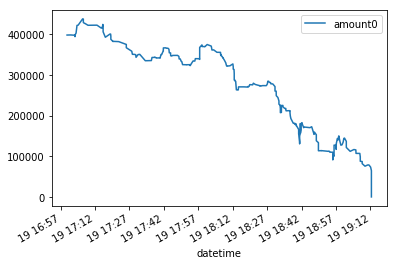

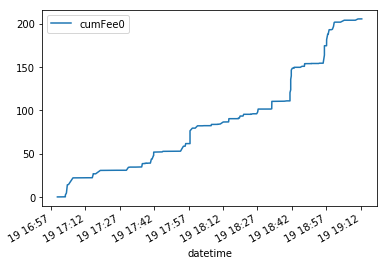

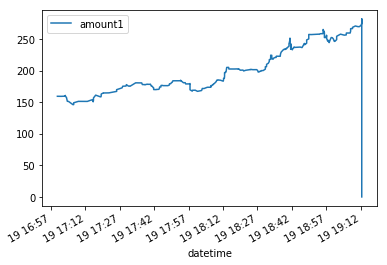

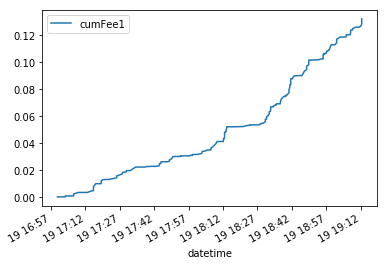

In [150]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-19 19:13:55,315606.529252,0.000000,0.000000,0.000000,152.089,0.000000,0.000000,0.000000
1,2021-05-19 19:14:18,339347.682582,11.870576,11.870576,11.870576,143.501,0.000000,0.000000,0.000000
2,2021-05-19 19:14:18,345914.854068,3.283585,15.154161,15.154161,141.133,0.000000,0.000000,0.000000
3,2021-05-19 19:14:18,350437.199340,2.261172,17.415333,17.415333,139.505,0.000000,0.000000,0.000000
4,2021-05-19 19:14:18,391135.986147,20.349393,37.764726,37.764726,124.924,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
340,2021-05-19 20:37:26,16695.679608,5.839254,713.347455,713.347455,264.259,0.000000,0.323291,0.323291
341,2021-05-19 20:37:31,26429.845003,4.867082,718.214537,718.214537,260.484,0.000000,0.323291,0.323291
342,2021-05-19 20:37:44,24338.480628,0.000000,718.214537,718.214537,261.294,0.000405,0.323696,0.323696
343,2021-05-19 20:37:53,25891.157446,0.776338,718.990875,718.990875,260.692,0.000000,0.323696,0.323696


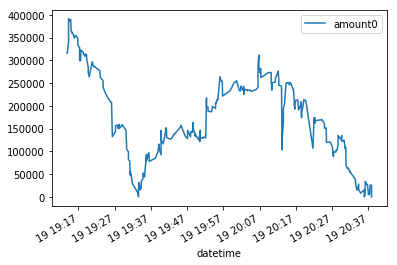

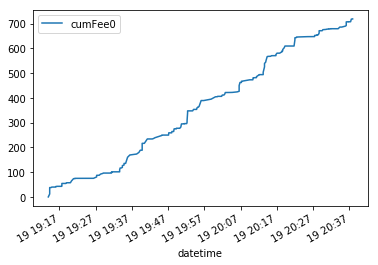

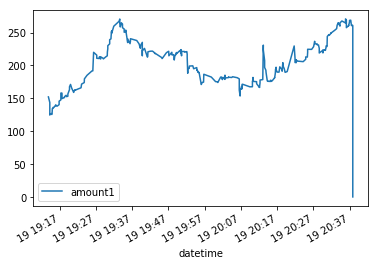

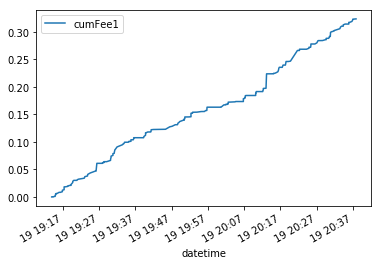

In [151]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-19 20:38:00,341907.854429,0.000000,0.000000,0.000000,153.945,0.000000,0.000000,0.000000
1,2021-05-19 20:39:37,335308.904877,0.000000,0.000000,0.000000,156.526,0.001291,0.001291,0.001291
2,2021-05-19 20:39:37,333380.325657,0.000000,0.000000,0.000000,157.281,0.000378,0.001668,0.001668
3,2021-05-19 20:39:39,346060.844805,6.340259,6.340259,6.340259,152.322,0.000000,0.001668,0.001668
4,2021-05-19 20:39:46,341697.247673,0.000000,6.340259,6.340259,154.027,0.000852,0.002520,0.002520
5,2021-05-19 20:40:45,341529.606563,0.000000,6.340259,6.340259,154.093,0.000033,0.002553,0.002553
6,2021-05-19 20:41:03,331261.735793,0.000000,6.340259,6.340259,158.111,0.002009,0.004562,0.004562
7,2021-05-19 20:41:03,329462.195157,0.000000,6.340259,6.340259,158.816,0.000353,0.004915,0.004915
8,2021-05-19 20:41:03,313549.499783,0.000000,6.340259,6.340259,165.063,0.003124,0.008038,0.008038
9,2021-05-19 20:41:22,313733.481473,0.091990,6.432249,6.432249,164.99,0.000000,0.008038,0.008038


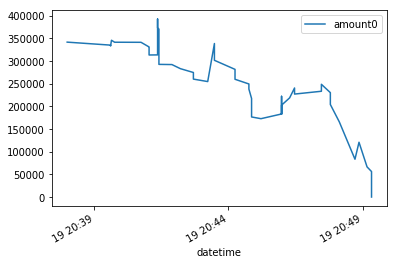

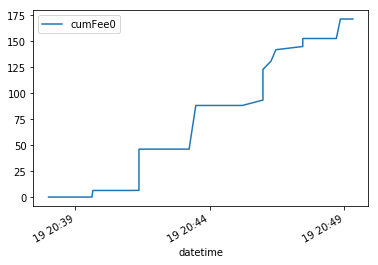

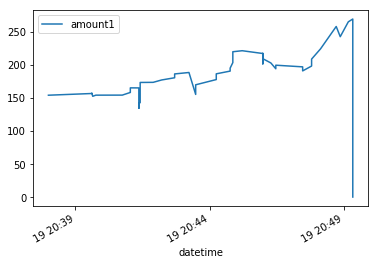

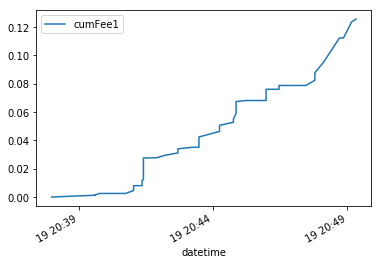

In [152]:
report.positions[3].get_balance(plain=True, draw_plot=True)

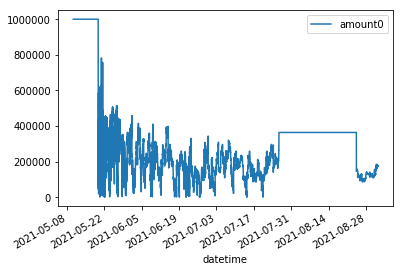

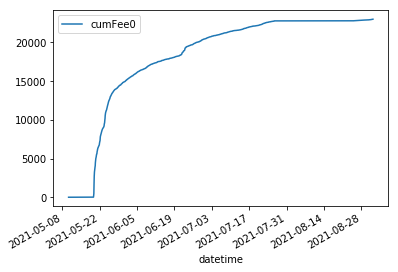

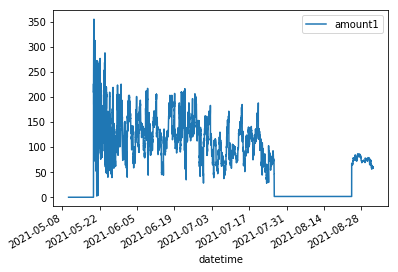

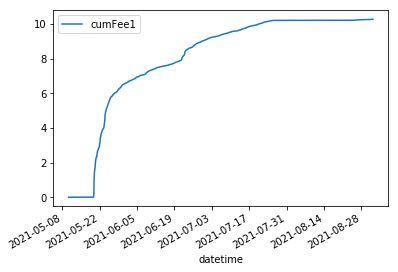

In [153]:
total_balance = report.total_balance(draw_plot=True, plain=True)

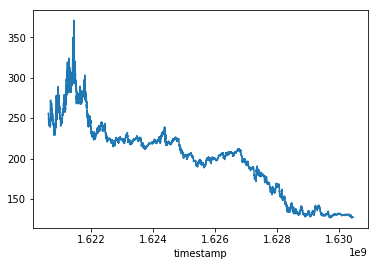

In [154]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
eth_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1) * price
usdt_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1)
usdt_balance+eth_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (usdt_balance+eth_balance)
tb_Timing.plot()

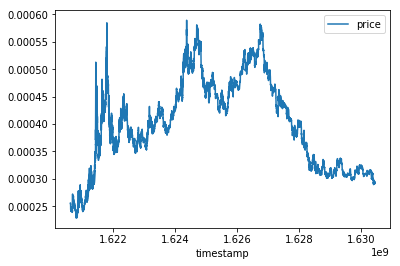

In [155]:
assets_value = pricedata.set_index("timestamp")["price"] * (total_balance["amount1"] / 10**decimal1) + total_balance["amount0"] / 10**decimal0
# assets_value.plot()
pricedata.set_index("timestamp")[["price"]].plot()